# Portrait Plot: Real Case Example -- Mean Climate (CMIP5 & 6)

- Generate a static image of Portrait plot (with or without triangles) using Matplotlib.
- Author: Jiwoo Lee
- Last update: 2022.04

## 1. Read data from JSON files

Input data for portrait plot is expected as a set a (stacked or list of) 2-d numpy array(s) with list of strings for x and y axes labels. 

### 1.1 Provide PMP output JSON files

In [1]:
import glob
import os
import numpy as np
import requests
import pandas as pd

PMP output files downloadable from the [PMP results archive](https://github.com/PCMDI/pcmdi_metrics_results_archive). 

In [2]:
vars = ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 
        'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']

In [3]:
json_dir = './json_files'
os.makedirs(json_dir, exist_ok=True)

In [4]:
mip = "cmip6"
exp = "historical"
data_version = "v20210811"

In [5]:
for var in vars:
    url = "https://raw.githubusercontent.com/PCMDI/pcmdi_metrics_results_archive/main/" + \
          "metrics_results/mean_climate/"+mip+"/"+exp+"/"+data_version+"/"+var+"."+mip+"."+exp+".regrid2.2p5x2p5."+data_version+".json"
    try:
        r = requests.get(url, allow_redirects=True)
        r.raise_for_status()
        filename = os.path.join(json_dir, url.split('/')[-1])
        if os.path.exists(filename):
            pass
        else:
            with open(filename, 'wb') as file:
                file.write(r.content)
            print('Download completed:', filename)
    except:
        print(var, 'not exist')
        pass

In [6]:
mip = "cmip5"
exp = "historical"
data_version = "v20200429"

In [7]:
for var in vars:
    url = "https://raw.githubusercontent.com/PCMDI/pcmdi_metrics_results_archive/main/" + \
          "metrics_results/mean_climate/"+mip+"/"+exp+"/"+data_version+"/"+var+"."+mip+"."+exp+".regrid2.2p5x2p5."+data_version+".json"
    try:
        r = requests.get(url, allow_redirects=True)
        r.raise_for_status()
        filename = os.path.join(json_dir, url.split('/')[-1])
        if os.path.exists(filename):
            pass
        else:
            with open(filename, 'wb') as file:
                file.write(r.content)
            print('Download completed:', filename)
    except:
        print(var, 'not exist')
        pass

prw not exist
rsdscs not exist
ts not exist


Check JSON files

In [8]:
json_list_1 = sorted(glob.glob(os.path.join(json_dir, '*.cmip5.' + exp + '*' + '.json')))
json_list_2 = sorted(glob.glob(os.path.join(json_dir, '*.cmip6.' + exp + '*' + '.json')))
for i, json_file in enumerate(json_list_1):
    print(i+1, json_file.split('/')[-1])
for i, json_file in enumerate(json_list_2):
    print(i+1, json_file.split('/')[-1])

1 pr.cmip5.historical.regrid2.2p5x2p5.v20200429.json
2 psl.cmip5.historical.regrid2.2p5x2p5.v20200429.json
3 rlds.cmip5.historical.regrid2.2p5x2p5.v20200429.json
4 rltcre.cmip5.historical.regrid2.2p5x2p5.v20200429.json
5 rlus.cmip5.historical.regrid2.2p5x2p5.v20200429.json
6 rlut.cmip5.historical.regrid2.2p5x2p5.v20200429.json
7 rlutcs.cmip5.historical.regrid2.2p5x2p5.v20200429.json
8 rsds.cmip5.historical.regrid2.2p5x2p5.v20200429.json
9 rsdt.cmip5.historical.regrid2.2p5x2p5.v20200429.json
10 rstcre.cmip5.historical.regrid2.2p5x2p5.v20200429.json
11 rsut.cmip5.historical.regrid2.2p5x2p5.v20200429.json
12 rsutcs.cmip5.historical.regrid2.2p5x2p5.v20200429.json
13 sfcWind.cmip5.historical.regrid2.2p5x2p5.v20200429.json
14 ta-200.cmip5.historical.regrid2.2p5x2p5.v20200429.json
15 ta-850.cmip5.historical.regrid2.2p5x2p5.v20200429.json
16 tas.cmip5.historical.regrid2.2p5x2p5.v20200429.json
17 tauu.cmip5.historical.regrid2.2p5x2p5.v20200429.json
18 ua-200.cmip5.historical.regrid2.2p5x2p5.v20

### 1.2 Extract data from JSON files

Use `read_mean_clim_json_files` function to extract data from the above JSON files.

#### Parameters
- `json_list`: list of string, where each element is for path/file for PMP output JSON files
- `stats`: list of string, where each element is statistic to extract from the JSON.  Optional
- `regions`: list of string, where each element is region to extract from the JSON.  Optional
- `mip`: string, category for mip, e.g., 'cmip6'.  Optional
- `debug`: bool, default=False, enable few print statements to help debug

#### Returns
- `df_dict`: dictionary that has `[stat][season][region]` hierarchy structure storing pandas dataframe for metric numbers (Rows: models, Columns: variables (i.e., 2d array)
- `var_list`: list of string, all variables from JSON files
- `var_unit_list`: list of string, all variables and its units from JSON files
- `regions`: list of string, regions
- `stats`: list of string, statistics

In [9]:
from pcmdi_metrics.graphics import read_mean_clim_json_files

In [156]:
df_dict_1, var_list_1, var_unit_list_1, regions_1, stats_1 = read_mean_clim_json_files(
    json_list_1, mip="cmip5")

In [157]:
df_dict_2, var_list_2, var_unit_list_2, regions_2, stats_2 = read_mean_clim_json_files(
    json_list_2, mip="cmip6")

In [158]:
print('var_list_1:', var_list_1)
print('var_unit_list_1:', var_unit_list_1)

var_list_1: ['pr', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 'ta-200', 'ta-850', 'tas', 'tauu', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']
var_unit_list_1: ['pr [kg m-2 s-1]', 'psl [Pa]', 'rlds [W m-2]', 'rltcre [W m-2]', 'rlus [W m-2]', 'rlut [W m-2]', 'rlutcs [W m-2]', 'rsds [W m-2]', 'rsdt [W m-2]', 'rstcre [W m-2]', 'rsut [W m-2]', 'rsutcs [W m-2]', 'sfcWind [m s-1]', 'ta-200 [K]', 'ta-850 [K]', 'tas [K]', 'tauu [Pa]', 'ua-200 [m s-1]', 'ua-850 [m s-1]', 'va-200 [m s-1]', 'va-850 [m s-1]', 'zg-500 [m]']


In [159]:
print('var_list_2:', var_list_2)
print('var_unit_list_2:', var_unit_list_2)

var_list_2: ['pr', 'prw', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'sfcWind', 'ta-200', 'ta-850', 'tas', 'tauu', 'ts', 'ua-200', 'ua-850', 'va-200', 'va-850', 'zg-500']
var_unit_list_2: ['pr [N/A]', 'prw [N/A]', 'psl [N/A]', 'rlds [N/A]', 'rltcre [W m-2]', 'rlus [N/A]', 'rlut [N/A]', 'rlutcs [N/A]', 'rsds [N/A]', 'rsdscs [N/A]', 'rsdt [N/A]', 'rstcre [W m-2]', 'rsut [N/A]', 'rsutcs [N/A]', 'sfcWind [N/A]', 'ta-200 [N/A]', 'ta-850 [N/A]', 'tas [N/A]', 'tauu [N/A]', 'ts [N/A]', 'ua-200 [N/A]', 'ua-850 [N/A]', 'va-200 [N/A]', 'va-850 [N/A]', 'zg-500 [N/A]']


In [160]:
def common_member(a, b):   
    a_set = set(a)
    b_set = set(b)
     
    # check length
    if len(a_set.intersection(b_set)) > 0:
        return(list(a_set.intersection(b_set)))
    else:
        return("no common elements")

In [161]:
var_list = sorted(common_member(var_list_1, var_list_2))
var_list.remove('sfcWind')
var_list.remove('ta-850')
var_list.remove('ua-850')
var_list.remove('ua-200')
var_list.remove('va-850')
var_list.remove('va-200')
var_list.remove('tauu')
print(var_list)
print(len(var_list))

['pr', 'psl', 'rlds', 'rltcre', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdt', 'rstcre', 'rsut', 'rsutcs', 'ta-200', 'tas', 'zg-500']
15


In [162]:
comp_list = ['mip', 'model', 'run'] + var_list

In [163]:
seasons = ['djf', 'mam', 'jja', 'son']
selected_models = ['ACCESS', 'BCC', 'CESM', 'Can', 'FGOALS', 'FIO-ESM', 'GFDL', 'IPSL', 'MIROC', 'MPI', 'MRI', 'NorESM']

df = dict()
data = dict()
landscape = True
#landscape = False


def selected_models_only(df, selected_models):
    # Selected models only
    model_names = df['model'].tolist()
    for model_name in model_names:
        drop_model = True
        for keyword in selected_models:
            if keyword in model_name:
                drop_model = False
                break
        if drop_model:
            df.drop(df.loc[df['model']==model_name].index, inplace=True)
    return df


for season in seasons:
    
    # Selected models only
    df_dict_1['rms_xy'][season]['global'] = selected_models_only(df_dict_1['rms_xy'][season]['global'], selected_models)
    df_dict_2['rms_xy'][season]['global'] = selected_models_only(df_dict_2['rms_xy'][season]['global'], selected_models)
            
    # mean value of statistics from multi models in each CMIP
    df_dict_1['rms_xy'][season]['global'].loc['mean'] = df_dict_1['rms_xy'][season]['global'].mean(numeric_only=True, skipna=True)
    df_dict_2['rms_xy'][season]['global'].loc['mean'] = df_dict_2['rms_xy'][season]['global'].mean(numeric_only=True, skipna=True)
    
    df_dict_1['rms_xy'][season]['global'].at['mean', 'model'] = 'CMIP5 mean'
    df_dict_2['rms_xy'][season]['global'].at['mean', 'model'] = 'CMIP6 mean'
    
    # merge dataframes
    df[season] = pd.concat([df_dict_1['rms_xy'][season]['global'][comp_list], df_dict_2['rms_xy'][season]['global'][comp_list]], axis=0)
    

    
    # reorder to have each mean at the end (bottom row) of the dataframe
    df_mean = df[season].loc['mean']
    df_mean_dropped = df[season].drop(index='mean')
    df_reordered = df_mean_dropped.append(df_mean)
    df[season] = df_reordered
    
    if landscape:
        data[season] = df[season][var_list].to_numpy().T
    else:
        data[season] = df[season][var_list].to_numpy()

In [164]:
data_all = np.stack([data['djf'], data['mam'], data['jja'], data['son']])
model_names = df['djf']['model'].tolist()

print('data.shape:', data_all.shape)
print('len(var_list): ', len(var_list))
print('len(model_names): ', len(model_names))

data.shape: (4, 15, 46)
len(var_list):  15
len(model_names):  46


In [165]:
if landscape:
    yaxis_labels = var_list
    xaxis_labels = model_names
else:
    xaxis_labels = var_list
    yaxis_labels = model_names

### 1.4 Normalize each column by its median

Use `normalize_by_median` function.

#### Parameters
- `data`: 2d numpy array
- `axis`: 0 (normalize each column) or 1 (normalize each row), default=0 

#### Return
- `data_nor`: 2d numpy array

In [166]:
if landscape:
    axis = 1
    figsize = (40, 10)
else:
    axis = 0
    figsize = (18, 25)

In [167]:
from pcmdi_metrics.graphics import normalize_by_median

data_djf_nor = normalize_by_median(data['djf'], axis=axis)
data_mam_nor = normalize_by_median(data['mam'], axis=axis)
data_jja_nor = normalize_by_median(data['jja'], axis=axis)
data_son_nor = normalize_by_median(data['son'], axis=axis)

In [168]:
data_all_nor = np.stack([data_djf_nor, data_mam_nor, data_jja_nor, data_son_nor])
data_all_nor.shape

(4, 15, 46)

## 2. Matplotlib-based PMP Visualization Function

In [169]:
from pcmdi_metrics.graphics import portrait_plot

<p id="parameters"></p>

Parameters
----------
- `data`: 2d numpy array, a list of 2d numpy arrays, or a 3d numpy array (i.e. stacked 2d numpy arrays)
- `xaxis_labels`: list of strings, labels for xaixs. Number of list element must consistent to x-axis, or 0 (empty list) to turn off xaxis tick labels
- `yaxis_labels`: list of strings, labels for yaxis. Number of list element must consistent to y-axis, or 0 (empty list) to turn off yaxis tick labels
- `fig`: [`matplotlib.figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) instance to which the portrait plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `ax`: [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/axes_api.html) instance to which the portrait plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `annotate`: bool, default=False, add annotating text if true, but work only for heatmap style map (i.e., no triangles)
- `annotate_data`: 2d numpy array, default=None. If None, the image's data is used.  Optional. 
- `annotate_fontsize`: number (int/float), default=15. Font size for annotation
- `annotate_format`: format for annotate value, default="{x:.2f}"
- `figsize`: tuple of two numbers (width, height), default=(12, 10), figure size in inches
- `vrange`: tuple of two numbers, range of value for colorbar.  Optional.
- `xaxis_fontsize`: number, default=15, font size for xaxis tick labels
- `yaxis_fontsize`: number, default=15, font size for yaxis tick labels
- `cmap`: string, default="RdBu_r", name of matplotlib colormap
- `cmap_bounds`: list of numbers.  If given, discrete colors are applied.  Optional.
- `cbar_label`: string, default=None, label for colorbar
- `cbar_label_fontsize`: number, default=15, font size for colorbar labels
- `cbar_tick_fontsize`: number, default=12, font size for colorbar tick labels
- `cbar_kw`: A dictionary with arguments to [`matplotlib.Figure.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html).  Optional.
- `colorbar_off`: Trun off colorbar if True.  Optional.
- `missing_color`: color, default="grey", [`matplotlib.axes.Axes.set_facecolor`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_facecolor.html) parameter
- `invert_yaxis`: bool, default=True, place y=0 at top on the plot
- `box_as_square`: bool, default=False, make each box as square
- `legend_on`: bool, default=False, show legend (only for 2 or 4 triangles portrait plot)
- `legend_labels`: list of strings, legend labels for triangls
- `legend_box_xy`: tuple of numbers, position of legend box's upper-left corner (lower-left if `invert_yaxis=False`), in `axes` coordinate
- `legend_box_size`: number, size of legend box
- `legend_lw`: number, line width of legend, default=1
- `legend_fontsize`: number, font size for legend, default=14
- `logo_rect`: sequence of float. The dimensions [left, bottom, width, height] of the PMP logo. All quantities are in fractions of figure width and height.  Optional
- `logo_off`: bool, default=False, turn off PMP logo
- `debug`: bool, default=False, if true print more message when running that help debugging

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis
- `cbar`: matplotlib component for colorbar (not returned if colorbar_off=True)

## 3. Plot

## 3.1 Portrait Plot with 4 Triangles (4 seasons)

- data order is clockwise from top: top, right, bottom, left

Text(0.5, 1.0, 'Seasonal climatology Model Performance (global)')

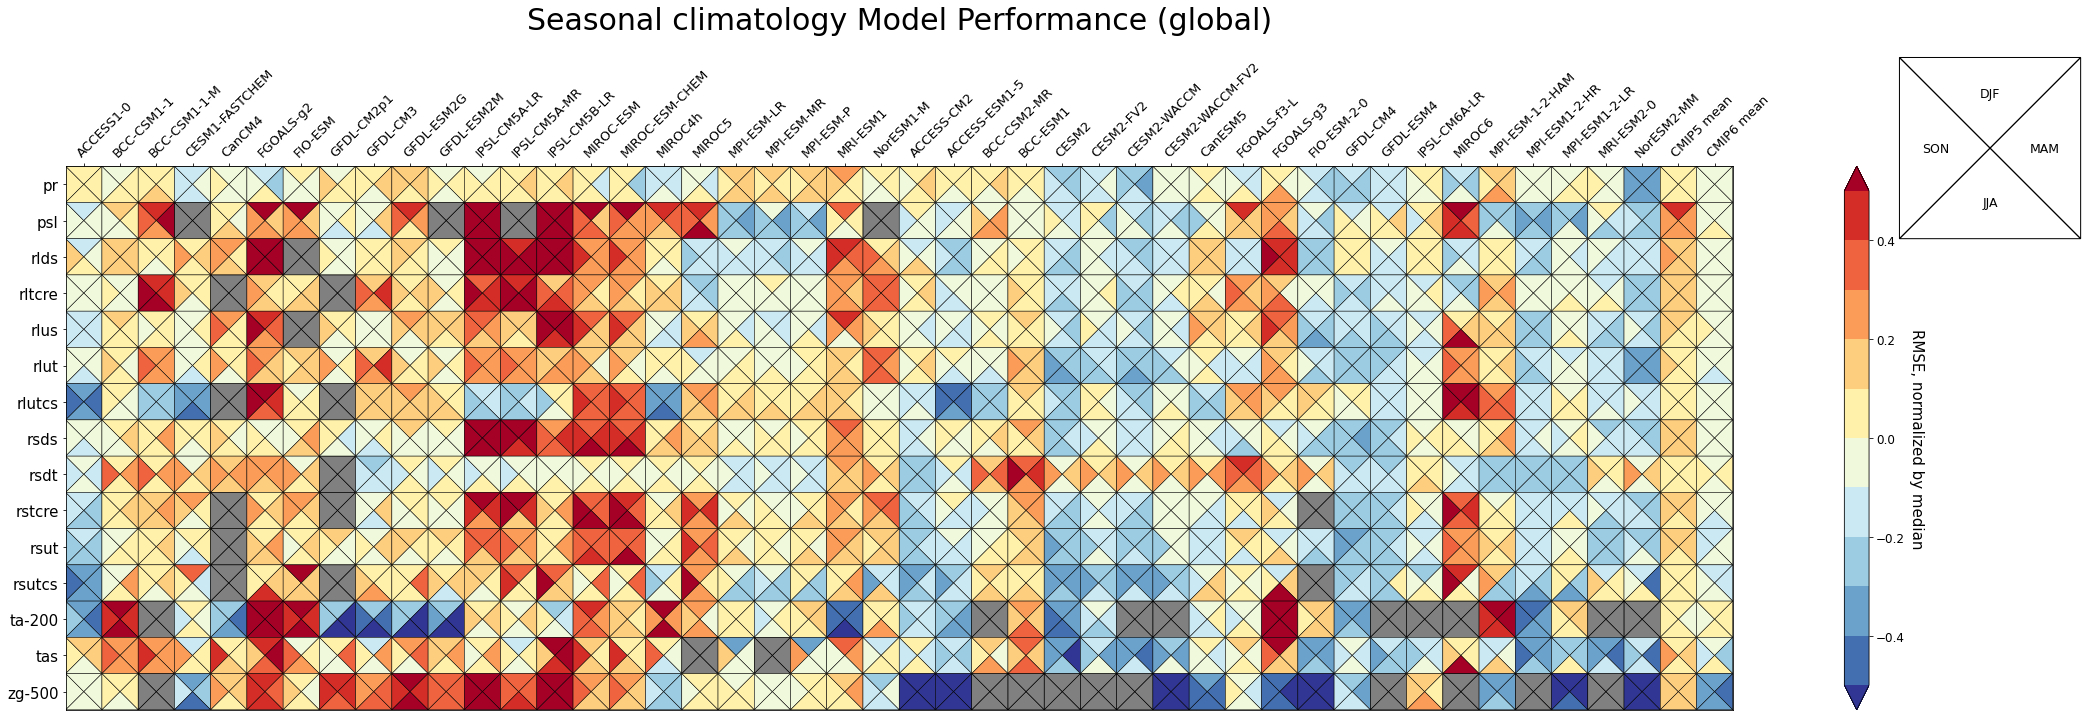

In [171]:
fig, ax, cbar = portrait_plot(data_all_nor,
                              xaxis_labels=xaxis_labels, 
                              yaxis_labels=yaxis_labels, 
                              cbar_label='RMSE, normalized by median',
                              box_as_square=True,
                              vrange=(-0.5, 0.5),
                              figsize=figsize,
                              xaxis_fontsize=13,
                              cmap='RdYlBu_r',
                              cmap_bounds=[-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5],
                              cbar_kw={"extend": "both"},
                              missing_color='grey',
                              legend_on=True,
                              legend_labels=['DJF', 'MAM', 'JJA', 'SON'],
                              #legend_box_xy=(1.25, 1),
                              legend_box_xy=(1.1, 1.2),
                              legend_box_size=5,
                              legend_lw=1,
                              legend_fontsize=12.5,
                              #logo_rect = [0.85, 0.15, 0.07, 0.07],
                              logo_off=True,
                             )
ax.set_xticklabels(xaxis_labels, rotation=45, va='bottom', ha="left")

# Add title
ax.set_title("Seasonal climatology Model Performance (global)", fontsize=30, pad=30)

In [172]:
# Save figure as an image file
fig.savefig('mean_clim_portrait_plot_4seasons_cmip56.png', facecolor='w', bbox_inches='tight')